In [ ]:
# Line Wrapping in Collaboratory Google results
# put this in the first cell of your notebook

from IPython.display import HTML, display

def set_css():
  display(HTML('''
  <style>
    pre {
        white-space: pre-wrap;
    }
  </style>
  '''))
get_ipython().events.register('pre_run_cell', set_css)

In [ ]:
import io
import requests
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

# Import dataset
import pandas as pd
DATA_DIR_1 = "/content/gdrive/MyDrive/Colab Notebooks/220919-ITS61504/breast_cancer.csv"
breast_cancer_df = pd.read_csv (DATA_DIR_1, header=0)

Mounted at /content/gdrive


# Practical Topic 3: Data Pre-processing

In [ ]:
breast_cancer_df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,8510426,B,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.04781,0.1885,0.05766
1,8510653,B,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.03110,0.1967,0.06811
2,8510824,B,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.02076,0.1815,0.06905
3,8511133,M,15.340,14.26,102.50,704.4,0.10730,0.21350,0.20770,0.09756,0.2521,0.07032
4,851509,M,21.160,23.04,137.20,1404.0,0.09428,0.10220,0.10970,0.08632,0.1769,0.05278


In [ ]:
# Identify the number of rows and columns
breast_cancer_df.shape

(569, 12)

In [ ]:
# User can specify the tuple's index to extract number of rows or columns
print("DataFrame breast_cancer_df has", breast_cancer_df.shape[0], "rows.")
print("DataFrame breast_cancer_df has", breast_cancer_df.shape[1], "columns.")

DataFrame breast_cancer_df has 569 rows.
DataFrame breast_cancer_df has 12 columns.


In [ ]:
# Identify the number of unique values for every attribute
breast_cancer_df.nunique()

NameError: ignored

In [ ]:
# Print basic information for every attribute
basicInformation = breast_cancer_df.info()
print (f"Basic Info:{basicInformation}" )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      569 non-null    int64  
 1   diagnosis               569 non-null    object 
 2   radius_mean             569 non-null    float64
 3   texture_mean            569 non-null    float64
 4   perimeter_mean          569 non-null    float64
 5   area_mean               569 non-null    float64
 6   smoothness_mean         569 non-null    float64
 7   compactness_mean        569 non-null    float64
 8   concavity_mean          569 non-null    float64
 9   concave points_mean     569 non-null    float64
 10  symmetry_mean           569 non-null    float64
 11  fractal_dimension_mean  569 non-null    float64
dtypes: float64(10), int64(1), object(1)
memory usage: 53.5+ KB
Basic Info:None


In [ ]:
# Print summary statistics for every attribute
diagnosis_statistics = breast_cancer_df.diagnosis.describe()
overall_statistics = breast_cancer_df.describe ()
print(f"Summary statistics for diagnosis column:\n")
print(f"{diagnosis_statistics}\n")
print(f"Overall Summary Statistics:\n")
print(f"{overall_statistics}\n")

Summary statistics for diagnosis column:

count     569
unique      2
top         B
freq      357
Name: diagnosis, dtype: object

Overall Summary Statistics:

                 id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      56

In [ ]:
# Check missing values by attribute
print("Number of missing values by column\n")
print (breast_cancer_df.isna().sum())

Number of missing values by column

id                        0
diagnosis                 0
radius_mean               0
texture_mean              0
perimeter_mean            0
area_mean                 0
smoothness_mean           0
compactness_mean          0
concavity_mean            0
concave points_mean       0
symmetry_mean             0
fractal_dimension_mean    0
dtype: int64


In [ ]:
# Display a BoxPlot
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sbn


IQR: 4.08
Lower_Fence: 5.58
Upper_Fence: 21.90
Data Outliers: 

            id diagnosis  radius_mean  texture_mean  perimeter_mean  \
82     8611555         M        25.22         24.91           171.5   
108      86355         M        22.27         19.67           152.8   
122     865423         M        24.25         20.20           166.2   
164    8712289         M        23.27         22.04           152.1   
180     873592         M        27.22         21.87           182.1   
202     878796         M        23.29         26.67           158.9   
212    8810703         M        28.11         18.47           188.5   
236   88299702         M        23.21         26.97           153.5   
339      89812         M        23.51         24.27           155.1   
352     899987         M        25.73         17.46           174.2   
369    9012000         M        22.01         21.90           147.2   
461  911296202         M        27.42         26.27           186.9   
503     91514

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


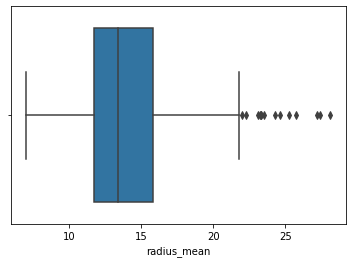

In [ ]:
# Removing outliers for radius_mean column

# Visualising data with a boxplot
sbn.boxplot(breast_cancer_df['radius_mean'])

# Compute the Interquartile Range (IQR)
Q1 = breast_cancer_df["radius_mean"].quantile(0.25)
Q3 = breast_cancer_df["radius_mean"].quantile(0.75)
IQR = Q3 - Q1
print ("IQR: %.2f" %IQR)

# Calculate the Lower and Upper Fence
Lower_Fence = Q1 - (1.5 * IQR)
print ("Lower_Fence: %.2f" %Lower_Fence)
Upper_Fence = Q3 + (1.5 * IQR)
print ("Upper_Fence: %.2f" %Upper_Fence)

# Display Outliers
print("Data Outliers: \n")
print (breast_cancer_df[((breast_cancer_df["radius_mean"] < Lower_Fence) | (breast_cancer_df["radius_mean"] > Upper_Fence))])

# Removing Outliers and storing remaining data
print(f"Original breast_cancer_df shape: {breast_cancer_df.shape}\n")
breast_cancer_df1 = breast_cancer_df[~((breast_cancer_df["radius_mean"] < Lower_Fence) | (breast_cancer_df["radius_mean"] > Upper_Fence))]
print(f"breast_cancer_df shape after removed outliers (column 1): {breast_cancer_df1.shape}\n")

IQR: 5.63
Lower_Fence: 7.73
Upper_Fence: 30.24
Data Outliers to be removed:
           id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
219  88119002         M        19.53         32.47          128.00     1223.0   
232  88203002         B        11.22         33.81           70.79      386.8   
239  88330202         M        17.46         39.28          113.40      920.6   
259  88725602         M        15.53         33.56          103.70      744.9   
265  88995002         M        20.73         31.12          135.70     1419.0   
455   9112085         B        13.38         30.72           86.34      557.2   
562    925622         M        15.22         30.62          103.40      716.9   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
219          0.08420           0.11300        0.114500             0.066370   
232          0.07780           0.03574        0.004967             0.006434   
239          0.09812           0.12980

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


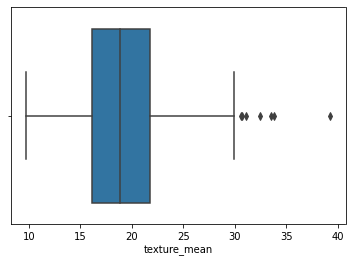

In [ ]:
# Removing outliers for texture_mean column

# Visualising texture_mean column with boxplot
sbn.boxplot(breast_cancer_df["texture_mean"])

# Compute the Interquartile Range (IQR)
Q1 = breast_cancer_df["texture_mean"].quantile(0.25)
Q3 = breast_cancer_df["texture_mean"].quantile(0.75)
IQR = Q3 - Q1
print ("IQR: %.2f" %IQR)

# Calculate the Lower and Upper Fence
Lower_Fence = Q1 - (1.5 * IQR)
print ("Lower_Fence: %.2f" %Lower_Fence)
Upper_Fence = Q3 + (1.5 * IQR)
print ("Upper_Fence: %.2f" %Upper_Fence)

# Data outliers to be removed
print("Data Outliers to be removed:")
print(breast_cancer_df1[((breast_cancer_df1["texture_mean"] < Lower_Fence) | (breast_cancer_df1["texture_mean"] > Upper_Fence))])

# Removing Outliers
print(f"Original breast_cancer_df shape: {breast_cancer_df1.shape}\n")
breast_cancer_df2 = breast_cancer_df1[~((breast_cancer_df1["texture_mean"] < Lower_Fence) | (breast_cancer_df1["texture_mean"] > Upper_Fence))]
print(f"breast_cancer_df shape after removed outliers (column 2): {breast_cancer_df2.shape}\n")

IQR: 28.93
Lower_Fence: 31.78
Upper_Fence: 147.49
Data Outliers to be removed:
Empty DataFrame
Columns: [id, diagnosis, radius_mean, texture_mean, perimeter_mean, area_mean, smoothness_mean, compactness_mean, concavity_mean, concave points_mean, symmetry_mean, fractal_dimension_mean]
Index: []
Original breast_cancer_df shape: (548, 12)

breast_cancer_df shape after removed outliers (column 3): (548, 12)



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


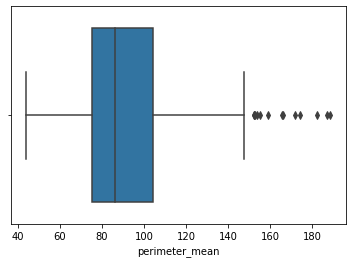

In [ ]:
# Removing outliers for perimeter_mean column

# Visualising perimeter_mean column with boxplot
sbn.boxplot(breast_cancer_df["perimeter_mean"])

# Compute the Interquartile Range (IQR)
Q1 = breast_cancer_df["perimeter_mean"].quantile(0.25)
Q3 = breast_cancer_df["perimeter_mean"].quantile(0.75)
IQR = Q3 - Q1
print ("IQR: %.2f" %IQR)

# Calculate the Lower and Upper Fence
Lower_Fence = Q1 - (1.5 * IQR)
print ("Lower_Fence: %.2f" %Lower_Fence)
Upper_Fence = Q3 + (1.5 * IQR)
print ("Upper_Fence: %.2f" %Upper_Fence)

# Data outliers to be removed
print("Data Outliers to be removed:")
print(breast_cancer_df2[((breast_cancer_df2["perimeter_mean"] < Lower_Fence) | (breast_cancer_df2["perimeter_mean"] > Upper_Fence))])

# Removing Outliers
print(f"Original breast_cancer_df shape: {breast_cancer_df2.shape}\n")
breast_cancer_df3 = breast_cancer_df2[~((breast_cancer_df2["perimeter_mean"] < Lower_Fence) | (breast_cancer_df2["perimeter_mean"] > Upper_Fence))]
print(f"breast_cancer_df shape after removed outliers (column 3): {breast_cancer_df3.shape}\n")

IQR: 362.40
Lower_Fence: -123.30
Upper_Fence: 1326.30
Data Outliers to be removed:
            id diagnosis  radius_mean  texture_mean  perimeter_mean  \
4       851509         M        21.16         23.04           137.2   
250     884948         M        20.94         23.56           138.9   
272    8910988         M        21.75         20.99           147.3   
368    9011971         M        21.71         17.25           140.9   
372    9012795         M        21.37         15.10           141.3   
373     901288         M        20.64         17.35           134.8   
393     903516         M        21.61         22.28           144.4   
449  911157302         M        21.10         20.52           138.1   
563     926125         M        20.92         25.09           143.0   
564     926424         M        21.56         22.39           142.0   

     area_mean  smoothness_mean  compactness_mean  concavity_mean  \
4       1404.0          0.09428           0.10220          0.1097 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


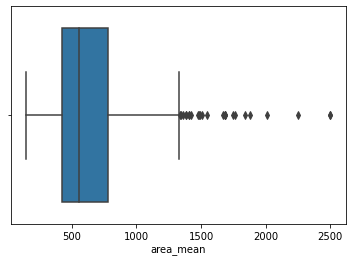

In [ ]:
# Removing outliers for area_mean column

# Visualising area_mean column with boxplot
sbn.boxplot(breast_cancer_df["area_mean"])

# Compute the Interquartile Range (IQR)
Q1 = breast_cancer_df["area_mean"].quantile(0.25)
Q3 = breast_cancer_df["area_mean"].quantile(0.75)
IQR = Q3 - Q1
print ("IQR: %.2f" %IQR)

# Calculate the Lower and Upper Fence
Lower_Fence = Q1 - (1.5 * IQR)
print ("Lower_Fence: %.2f" %Lower_Fence)
Upper_Fence = Q3 + (1.5 * IQR)
print ("Upper_Fence: %.2f" %Upper_Fence)

# Data outliers to be removed
print("Data Outliers to be removed:")
print(breast_cancer_df3[((breast_cancer_df3["area_mean"] < Lower_Fence) | (breast_cancer_df3["area_mean"] > Upper_Fence))])

# Removing Outliers
print(f"Original breast_cancer_df shape: {breast_cancer_df3.shape}\n")
breast_cancer_df4 = breast_cancer_df3[~((breast_cancer_df3["area_mean"] < Lower_Fence) | (breast_cancer_df3["area_mean"] > Upper_Fence))]
print(f"breast_cancer_df shape after removed outliers (Column 4): {breast_cancer_df4.shape}\n")

IQR: 0.02
Lower_Fence: 0.06
Upper_Fence: 0.13
Data Outliers to be removed:
           id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
62   84348301         M       11.420         20.38           77.58      386.1   
105    863030         M       13.110         15.56           87.21      530.2   
504    915186         B        9.268         12.87           61.49      248.7   
520    917092         B        9.295         13.90           59.96      257.8   
568     92751         B        7.760         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
62           0.14250           0.28390         0.24140              0.10520   
105          0.13980           0.17650         0.20710              0.09601   
504          0.16340           0.22390         0.09730              0.05252   
520          0.13710           0.12250         0.03332              0.02421   
568          0.05263           0.04362     

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


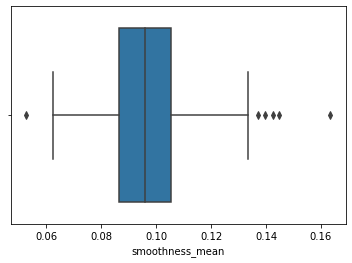

In [ ]:
# Removing outliers for smoothness_mean column

# Visualising smoothness_mean column with boxplot
sbn.boxplot(breast_cancer_df["smoothness_mean"])

# Compute the Interquartile Range (IQR)
Q1 = breast_cancer_df["smoothness_mean"].quantile(0.25)
Q3 = breast_cancer_df["smoothness_mean"].quantile(0.75)
IQR = Q3 - Q1
print ("IQR: %.2f" %IQR)

# Calculate the Lower and Upper Fence
Lower_Fence = Q1 - (1.5 * IQR)
print ("Lower_Fence: %.2f" %Lower_Fence)
Upper_Fence = Q3 + (1.5 * IQR)
print ("Upper_Fence: %.2f" %Upper_Fence)

# Data outliers to be removed
print("Data Outliers to be removed:")
print(breast_cancer_df4[((breast_cancer_df4["smoothness_mean"] < Lower_Fence) | (breast_cancer_df4["smoothness_mean"] > Upper_Fence))])

# Removing Outliers
print(f"Original breast_cancer_df shape: {breast_cancer_df4.shape}\n")
breast_cancer_df5 = breast_cancer_df4[~((breast_cancer_df4["smoothness_mean"] < Lower_Fence) | (breast_cancer_df4["smoothness_mean"] > Upper_Fence))]
print(f"breast_cancer_df shape after removed outliers (column 5): {breast_cancer_df5.shape}\n")

IQR: 0.07
Lower_Fence: -0.03
Upper_Fence: 0.23
Data Outliers to be removed:
           id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
52     846226         M        19.17         24.80          132.40     1123.0   
54   84667401         M        13.73         22.61           93.60      578.3   
59     842302         M        17.99         10.38          122.80     1001.0   
68   84501001         M        12.46         24.04           83.97      475.9   
78    8610862         M        20.18         23.97          143.70     1245.0   
181    873593         M        21.09         26.57          142.70     1311.0   
190    874858         M        14.22         23.12           94.37      609.9   
258    887181         M        15.66         23.20          110.20      773.5   
351    899667         M        15.75         19.22          107.10      758.6   
400  90439701         M        17.91         21.02          124.40      994.0   
567    927241         M        20

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


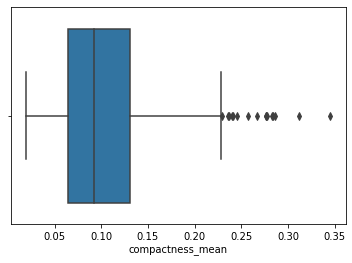

In [ ]:
# Removing outliers for compactness_mean column

# Visualising compactness_mean column with boxplot
sbn.boxplot(breast_cancer_df["compactness_mean"])

# Compute the Interquartile Range (IQR)
Q1 = breast_cancer_df["compactness_mean"].quantile(0.25)
Q3 = breast_cancer_df["compactness_mean"].quantile(0.75)
IQR = Q3 - Q1
print ("IQR: %.2f" %IQR)

# Calculate the Lower and Upper Fence
Lower_Fence = Q1 - (1.5 * IQR)
print ("Lower_Fence: %.2f" %Lower_Fence)
Upper_Fence = Q3 + (1.5 * IQR)
print ("Upper_Fence: %.2f" %Upper_Fence)

# Data outliers to be removed
print("Data Outliers to be removed:")
print(breast_cancer_df5[((breast_cancer_df5["compactness_mean"] < Lower_Fence) | (breast_cancer_df5["compactness_mean"] > Upper_Fence))])

# Removing Outliers
print(f"Original breast_cancer_df shape: {breast_cancer_df5.shape}\n")
breast_cancer_df6 = breast_cancer_df5[~((breast_cancer_df5["compactness_mean"] < Lower_Fence) | (breast_cancer_df5["compactness_mean"] > Upper_Fence))]
print(f"breast_cancer_df shape after removed outliers (column 6): {breast_cancer_df6.shape}\n")

IQR: 0.10
Lower_Fence: -0.12
Upper_Fence: 0.28
Data Outliers to be removed:
          id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
28    859471         B        9.029         17.33           58.79      250.5   
112    86409         B       14.260         19.65           97.83      629.9   
152  8710441         B        9.731         15.34           63.78      300.2   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
28           0.10660            0.1413          0.3130              0.04375   
112          0.07837            0.2233          0.3003              0.07798   
152          0.10720            0.1599          0.4108              0.07857   

     symmetry_mean  fractal_dimension_mean  
28          0.2111                 0.08046  
112         0.1704                 0.07769  
152         0.2548                 0.09296  
Original breast_cancer_df shape: (522, 12)

breast_cancer_df shape after removed outliers (column 7): (519

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


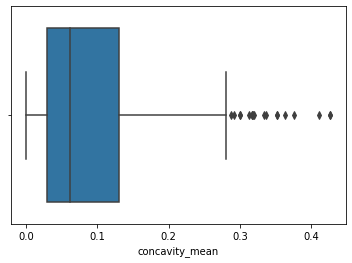

In [ ]:
# Removing outliers for concavity_mean column

# Visualising concavity_mean column with boxplot
sbn.boxplot(breast_cancer_df["concavity_mean"])

# Compute the Interquartile Range (IQR)
Q1 = breast_cancer_df["concavity_mean"].quantile(0.25)
Q3 = breast_cancer_df["concavity_mean"].quantile(0.75)
IQR = Q3 - Q1
print ("IQR: %.2f" %IQR)

# Calculate the Lower and Upper Fence
Lower_Fence = Q1 - (1.5 * IQR)
print ("Lower_Fence: %.2f" %Lower_Fence)
Upper_Fence = Q3 + (1.5 * IQR)
print ("Upper_Fence: %.2f" %Upper_Fence)

# Data outliers to be removed
print("Data Outliers to be removed:")
print(breast_cancer_df6[((breast_cancer_df6["concavity_mean"] < Lower_Fence) | (breast_cancer_df6["concavity_mean"] > Upper_Fence))])

# Removing Outliers
print(f"Original breast_cancer_df shape: {breast_cancer_df6.shape}\n")
breast_cancer_df7 = breast_cancer_df6[~((breast_cancer_df5["concavity_mean"] < Lower_Fence) | (breast_cancer_df6["concavity_mean"] > Upper_Fence))]
print(f"breast_cancer_df shape after removed outliers (column 7): {breast_cancer_df7.shape}\n")

IQR: 0.05
Lower_Fence: -0.06
Upper_Fence: 0.15
Data Outliers to be removed:
Empty DataFrame
Columns: [id, diagnosis, radius_mean, texture_mean, perimeter_mean, area_mean, smoothness_mean, compactness_mean, concavity_mean, concave points_mean, symmetry_mean, fractal_dimension_mean]
Index: []
Original breast_cancer_df shape: (519, 12)

breast_cancer_df shape after removed outliers (column 8): (519, 12)



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


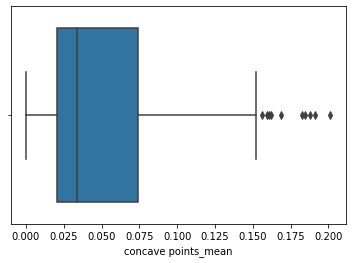

In [ ]:
# Removing outliers for concave points_mean column

# Visualising concave points_mean column with boxplot
sbn.boxplot(breast_cancer_df["concave points_mean"])

# Compute the Interquartile Range (IQR)
Q1 = breast_cancer_df["concave points_mean"].quantile(0.25)
Q3 = breast_cancer_df["concave points_mean"].quantile(0.75)
IQR = Q3 - Q1
print ("IQR: %.2f" %IQR)

# Calculate the Lower and Upper Fence
Lower_Fence = Q1 - (1.5 * IQR)
print ("Lower_Fence: %.2f" %Lower_Fence)
Upper_Fence = Q3 + (1.5 * IQR)
print ("Upper_Fence: %.2f" %Upper_Fence)

# Data outliers to be removed
print("Data Outliers to be removed:")
print(breast_cancer_df7[((breast_cancer_df7["concave points_mean"] < Lower_Fence) | (breast_cancer_df7["concave points_mean"] > Upper_Fence))])

# Removing Outliers
print(f"Original breast_cancer_df shape: {breast_cancer_df7.shape}\n")
breast_cancer_df8 = breast_cancer_df7[~((breast_cancer_df5["concave points_mean"] < Lower_Fence) | (breast_cancer_df7["concave points_mean"] > Upper_Fence))]
print(f"breast_cancer_df shape after removed outliers (column 8): {breast_cancer_df8.shape}\n")

IQR: 0.03
Lower_Fence: 0.11
Upper_Fence: 0.25
Data Outliers to be removed:
            id diagnosis  radius_mean  texture_mean  perimeter_mean  \
3      8511133         M       15.340         14.26          102.50   
6       852631         M       17.140         16.40          116.00   
20      858970         B       10.170         14.88           64.55   
146     869691         M       11.800         16.58           78.99   
150  871001501         B       13.000         20.78           83.51   
288    8913049         B       11.260         19.96           73.72   
323     895100         M       20.340         21.51          135.90   
424     907145         B        9.742         19.12           61.93   
561     925311         B       11.200         29.37           70.67   

     area_mean  smoothness_mean  compactness_mean  concavity_mean  \
3        704.4          0.10730           0.21350        0.207700   
6        912.7          0.11860           0.22760        0.222900   
20     

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


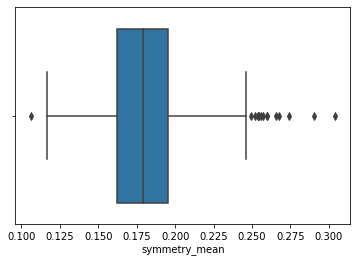

In [ ]:
# Removing outliers for symmetry_mean column

# Visualising symmetry_mean column with boxplot
sbn.boxplot(breast_cancer_df["symmetry_mean"])

# Compute the Interquartile Range (IQR)
Q1 = breast_cancer_df["symmetry_mean"].quantile(0.25)
Q3 = breast_cancer_df["symmetry_mean"].quantile(0.75)
IQR = Q3 - Q1
print ("IQR: %.2f" %IQR)

# Calculate the Lower and Upper Fence
Lower_Fence = Q1 - (1.5 * IQR)
print ("Lower_Fence: %.2f" %Lower_Fence)
Upper_Fence = Q3 + (1.5 * IQR)
print ("Upper_Fence: %.2f" %Upper_Fence)

# Data outliers to be removed
print("Data Outliers to be removed:")
print(breast_cancer_df8[((breast_cancer_df8["symmetry_mean"] < Lower_Fence) | (breast_cancer_df8["symmetry_mean"] > Upper_Fence))])

# Removing Outliers
print(f"Original breast_cancer_df shape: {breast_cancer_df.shape}\n")
breast_cancer_df9 = breast_cancer_df8[~((breast_cancer_df8["symmetry_mean"] < Lower_Fence) | (breast_cancer_df8["symmetry_mean"] > Upper_Fence))]
print(f"breast_cancer_df shape after removed outliers (column 9): {breast_cancer_df9.shape}\n")

IQR: 0.01
Lower_Fence: 0.05
Upper_Fence: 0.08
Data Outliers to be removed:
            id diagnosis  radius_mean  texture_mean  perimeter_mean  \
71      859711         B        8.888         14.64           58.79   
151  871001502         B        8.219         20.70           53.27   
176     872608         B        9.904         18.06           64.60   
318     894329         B        9.042         18.90           60.07   
376     901315         B       10.570         20.22           70.15   
379    9013838         M       11.080         18.83           73.30   
505     915276         B        9.676         13.14           64.12   
507   91544002         B       11.060         17.12           71.25   

     area_mean  smoothness_mean  compactness_mean  concavity_mean  \
71       244.0          0.09783            0.1531         0.08606   
151      203.9          0.09405            0.1305         0.13210   
176      302.4          0.09699            0.1294         0.13070   
318      

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


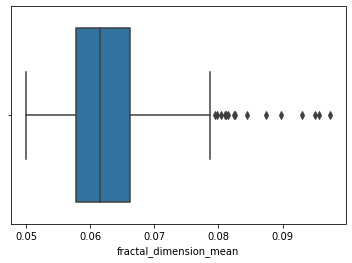

In [ ]:
# Removing outliers for fractal_dimension_mean column

# Visualising fractal_dimension_mean column with boxplot
sbn.boxplot(breast_cancer_df["fractal_dimension_mean"])

# Compute the Interquartile Range (IQR)
Q1 = breast_cancer_df["fractal_dimension_mean"].quantile(0.25)
Q3 = breast_cancer_df["fractal_dimension_mean"].quantile(0.75)
IQR = Q3 - Q1
print ("IQR: %.2f" %IQR)

# Calculate the Lower and Upper Fence
Lower_Fence = Q1 - (1.5 * IQR)
print ("Lower_Fence: %.2f" %Lower_Fence)
Upper_Fence = Q3 + (1.5 * IQR)
print ("Upper_Fence: %.2f" %Upper_Fence)

# Data outliers to be removed
print("Data Outliers to be removed:")
print(breast_cancer_df9[((breast_cancer_df9["fractal_dimension_mean"] < Lower_Fence) | (breast_cancer_df9["fractal_dimension_mean"] > Upper_Fence))])

# Removing Outliers
print(f"Original breast_cancer_df shape: {breast_cancer_df.shape}\n")
breast_cancer_df10 = breast_cancer_df9[~((breast_cancer_df9["fractal_dimension_mean"] < Lower_Fence) | (breast_cancer_df9["fractal_dimension_mean"] > Upper_Fence))]
print(f"breast_cancer_df shape after removed outliers (column 10): {breast_cancer_df10.shape}\n")

# Determine if the dataset is balanced or imbalanced?

In [ ]:
pip install -U imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 199 kB 7.3 MB/s 
     |████████████████████████████████| 199 kB 49.5 MB/s 
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.8.1
    Uninstalling imbalanced-learn-0.8.1:
      Successfully uninstalled imbalanced-learn-0.8.1


B    357
M    212
Name: diagnosis, dtype: int64


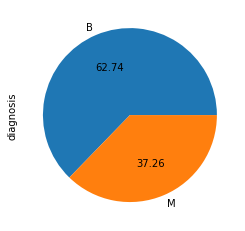

In [ ]:
# assign all attributes excluding the diagnosis attribute to the variable x.
x = breast_cancer_df.drop(["diagnosis"], axis=1)

# assign all attributes excluding the diagnosis attribute to the variable x.
y = breast_cancer_df["diagnosis"]

# print the values of the two classes under the diagnosis column
print(y.value_counts())

# plot a pie chart of for the diagnosis column
y.value_counts().plot.pie(autopct="%.2f")

## EDA

In [ ]:
# Dropping attributes not involved in the EDA and printing the first five rows of the attributes involved in the EDA
eda = breast_cancer_df.drop(["id", "texture_mean", "smoothness_mean", "compactness_mean", "symmetry_mean", "fractal_dimension_mean"], axis=1)
eda.head()

,diagnosis,radius_mean,perimeter_mean,area_mean,concavity_mean,concave points_mean
0,B,13.540,87.46,566.3,0.06664,0.04781
1,B,13.080,85.63,520.0,0.04568,0.03110
2,B,9.504,60.34,273.9,0.02956,0.02076
3,M,15.340,102.50,704.4,0.20770,0.09756
4,M,21.160,137.20,1404.0,0.10970,0.08632


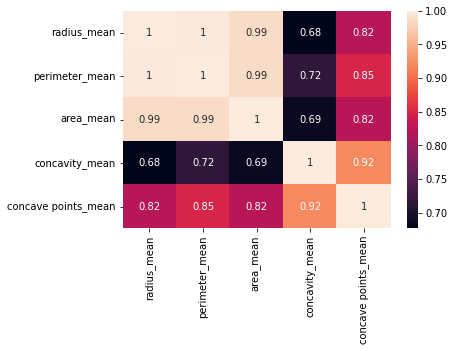

In [ ]:
# Calculating the r values and plotting a heatmap
correlation = eda.corr()
sbn.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns, annot=True)

For the relationship analysis, eda.corr() and sbn.heatmap() were used to plot a heatmap based on the Pearson’s r correlation value of the five attributes.
- As shown in the figure above, perimeter mean has an almost perfect positive correlation with radius mean and area mean with r values of 1 and 0.99 respectively.
- Perimeter mean is also strongly correlated with concavity mean and concave points mean with r values of 0.72 and 0.85 respectively

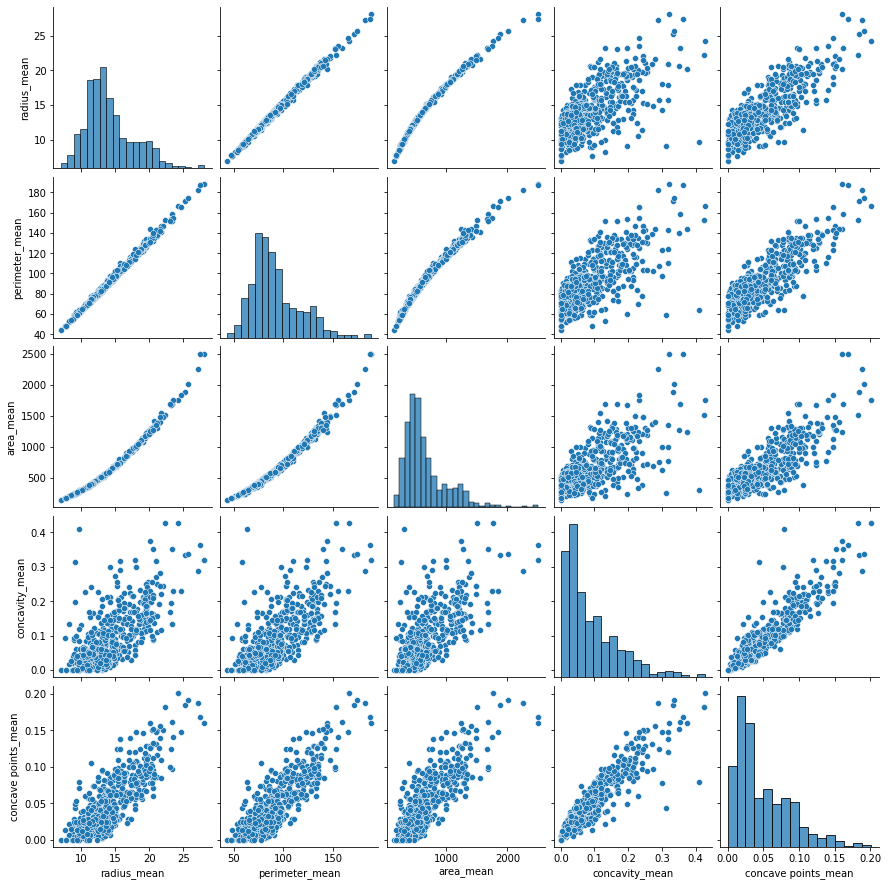

In [ ]:
# Plotting the pairplot of all 5 attributes
import seaborn as sbn

sbn.pairplot(eda)

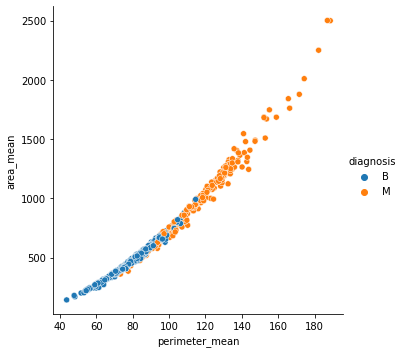

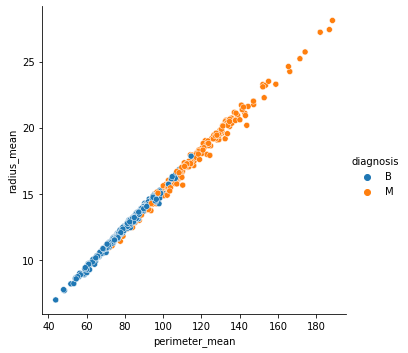

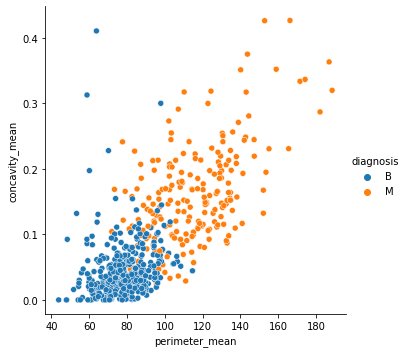

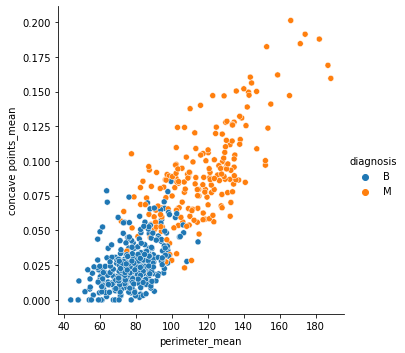

In [ ]:
# Plotting scatter plots for the  perimeter_mean attribute and colouring them by their diagnoses
sbn.relplot(x="perimeter_mean", y="area_mean", hue="diagnosis", data=eda)
sbn.relplot(x="perimeter_mean", y="radius_mean", hue="diagnosis", data=eda)
sbn.relplot(x="perimeter_mean", y="concavity_mean", hue="diagnosis", data=eda)
sbn.relplot(x="perimeter_mean", y="concave points_mean", hue="diagnosis", data=eda)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


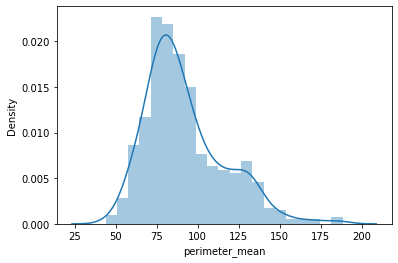

In [ ]:
# Plotting a histogram and distribution curve for the perimeter_mean attribute
sbn.distplot(eda["perimeter_mean"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


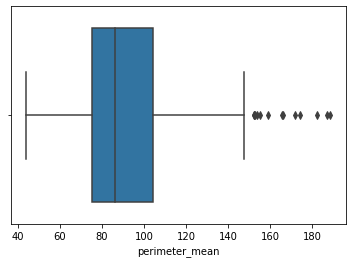

In [ ]:
# Plotting a boxplot for the perimeter_mean attribute
sbn.boxplot(eda["perimeter_mean"])

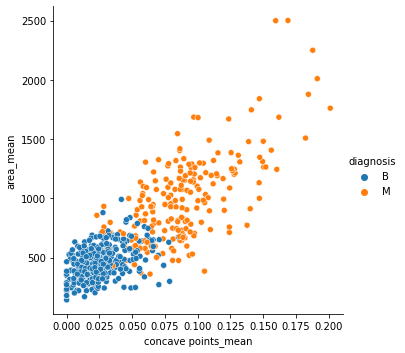

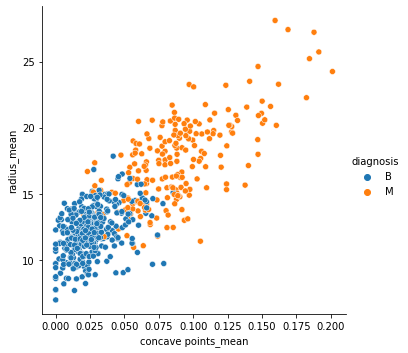

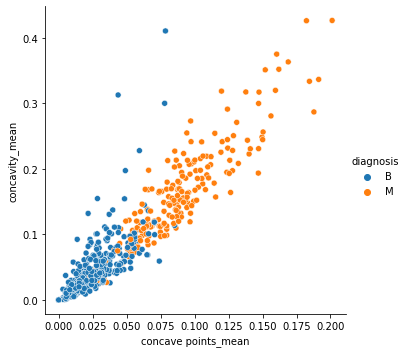

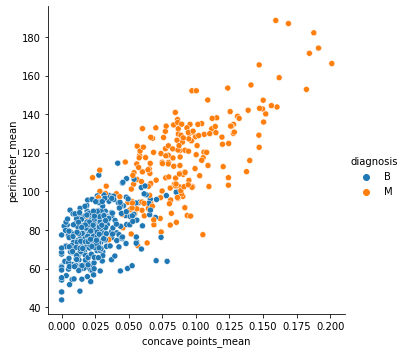

In [ ]:
# Plotting scatter plots for the concave points_mean attribute and colouring them by their diagnoses
sbn.relplot(x="concave points_mean", y="area_mean", hue="diagnosis", data=eda)
sbn.relplot(x="concave points_mean", y="radius_mean", hue="diagnosis", data=eda)
sbn.relplot(x="concave points_mean", y="concavity_mean", hue="diagnosis", data=eda)
sbn.relplot(x="concave points_mean", y="perimeter_mean", hue="diagnosis", data=eda)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


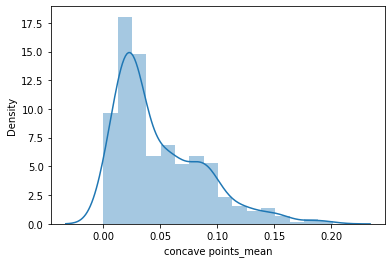

In [ ]:
# Plotting a histogram and distribution curve for the concave points_mean attribute
sbn.distplot(eda["concave points_mean"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


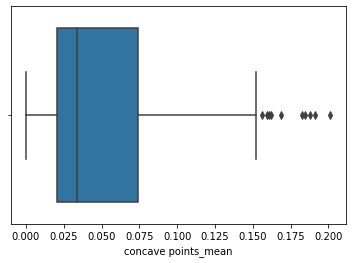

In [ ]:
# Plotting a boxplot for the concave points_mean attribute
sbn.boxplot(eda["concave points_mean"])

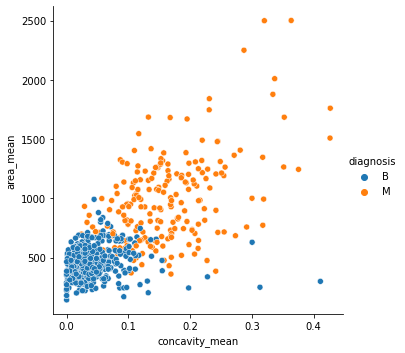

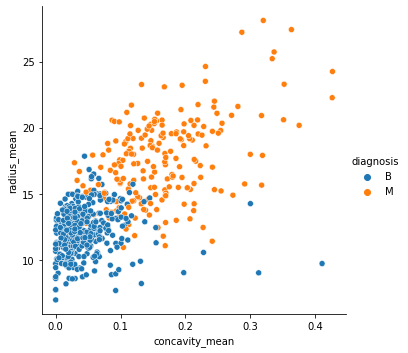

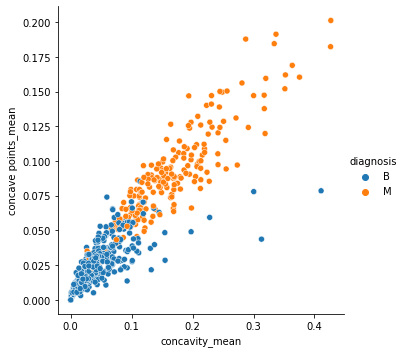

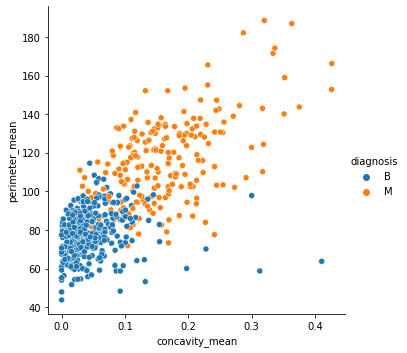

In [ ]:
# Plotting scatter plots for the concavity_mean attribute and colouring them by their diagnoses
sbn.relplot(x="concavity_mean", y="area_mean", hue="diagnosis", data=eda)
sbn.relplot(x="concavity_mean", y="radius_mean", hue="diagnosis", data=eda)
sbn.relplot(x="concavity_mean", y="concave points_mean", hue="diagnosis", data=eda)
sbn.relplot(x="concavity_mean", y="perimeter_mean", hue="diagnosis", data=eda)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


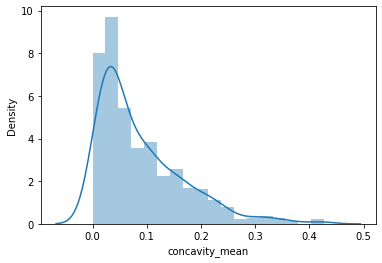

In [ ]:
# Plotting a histogram and distribution curve for the concavity_mean attribute
sbn.distplot(eda["concavity_mean"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


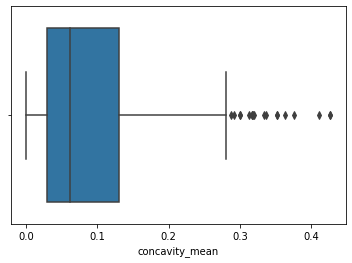

In [ ]:
# Plotting a boxplot for the concavity_mean attribute
sbn.boxplot(eda["concavity_mean"])

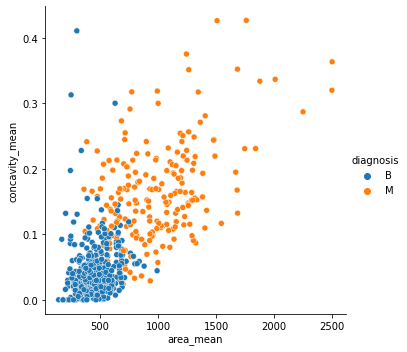

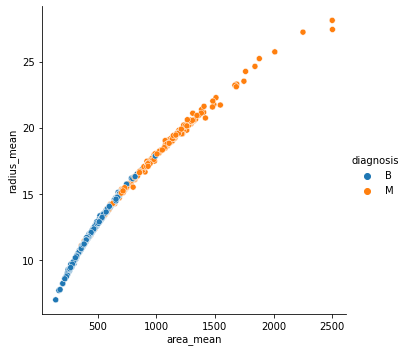

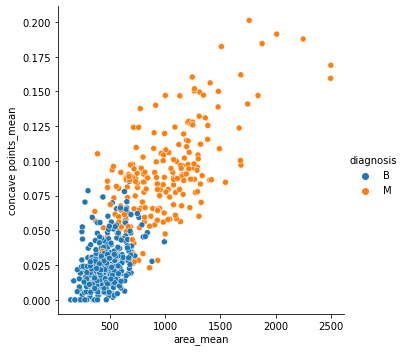

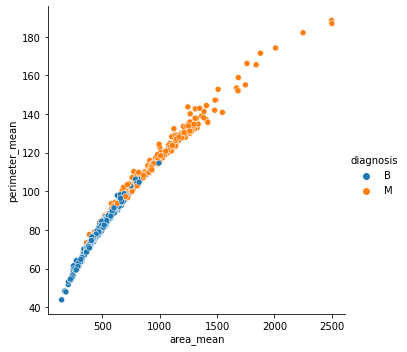

In [ ]:
# Plotting scatter plots for the area_mean attribute and colouring them by their diagnoses
sbn.relplot(x="area_mean", y="concavity_mean", hue="diagnosis", data=eda)
sbn.relplot(x="area_mean", y="radius_mean", hue="diagnosis", data=eda)
sbn.relplot(x="area_mean", y="concave points_mean", hue="diagnosis", data=eda)
sbn.relplot(x="area_mean", y="perimeter_mean", hue="diagnosis", data=eda)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


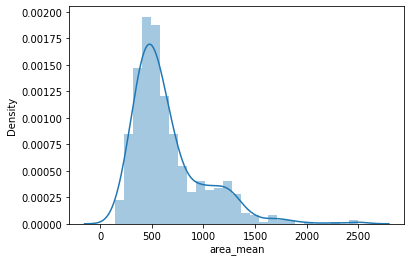

In [ ]:
# Plotting a histogram and distribution curve for the area_mean attribute
sbn.distplot(eda["area_mean"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


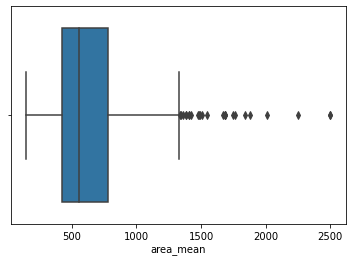

In [ ]:
# Plotting a boxplot for the area_mean attribute
sbn.boxplot(eda["area_mean"])

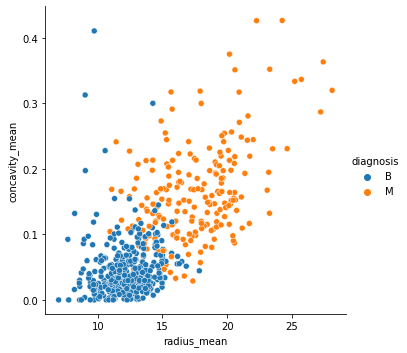

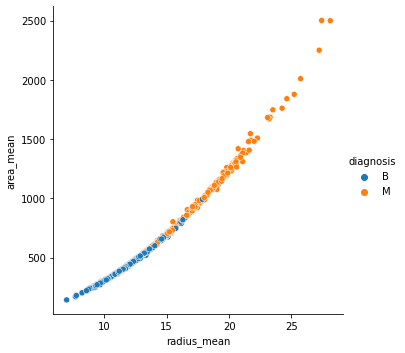

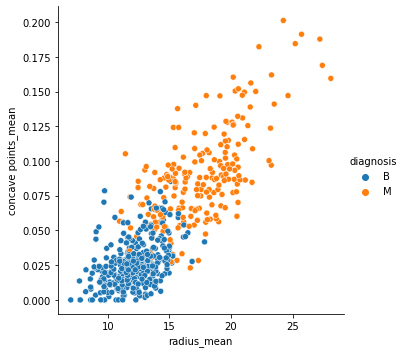

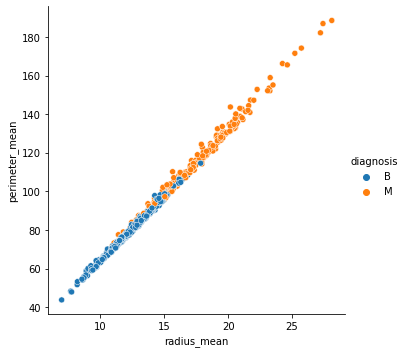

In [ ]:
# Plotting scatter plots for the radius_mean attribute and colouring them by their diagnoses
sbn.relplot(x="radius_mean", y="concavity_mean", hue="diagnosis", data=eda)
sbn.relplot(x="radius_mean", y="area_mean", hue="diagnosis", data=eda)
sbn.relplot(x="radius_mean", y="concave points_mean", hue="diagnosis", data=eda)
sbn.relplot(x="radius_mean", y="perimeter_mean", hue="diagnosis", data=eda)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


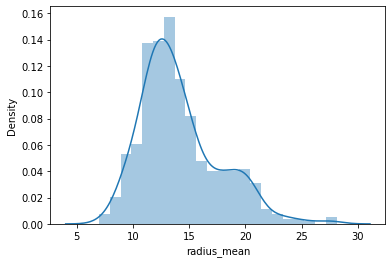

In [ ]:
# Plotting a histogram and distribution curve for the radius_mean attribute
sbn.distplot(eda["radius_mean"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


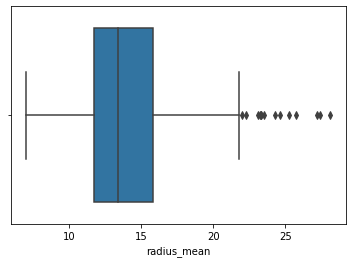

In [ ]:
# Plotting a boxplot for the radius_mean attribute
sbn.boxplot(eda["radius_mean"])

# Practical Topic 4: Machine Learning

### After eliminating outliers, examine the pre-processed dataset for imbalances.

The pre-processed dataset's categorical variable "diagnosis" has two levels: benign (B) and malignant (M).

There are 337 datapoints with the value "B" for "benign" and 165 with the value "M" for "malignant," respectively.

With a data distribution of 2:1 for B:M, the dataset is only slightly out of balance, so no additional steps are required to balance it.

References [(Link Here)](https://machinelearningmastery.com/what-is-imbalanced-classification/#:~:text=A%20slight%20imbalance%20is%20often%20not%20a%20concern%2C%20and%20the%20problem%20can%20often%20be%20treated%20like%20a%20normal%20classification%20predictive%20modeling%20problem.%20A%20severe%20imbalance%20of%20the%20classes%20can%20be%20challenging%20to%20model%20and%20may%20require%20the%20use%20of%20specialized%20techniques.):
>-  Slight Imbalance. An imbalanced classification problem where the distribution of examples is uneven by a small amount in the training dataset (e.g. 4:6).
>- Severe Imbalance. An imbalanced classification problem where the distribution of examples is uneven by a large amount in the training dataset (e.g. 1:100 or more).

A slight imbalance is often not a concern, and the problem can often be treated like a normal classification predictive modeling problem. A severe imbalance of the classes can be challenging to model and may require the use of specialized techniques>>

B    337
M    165
Name: diagnosis, dtype: int64


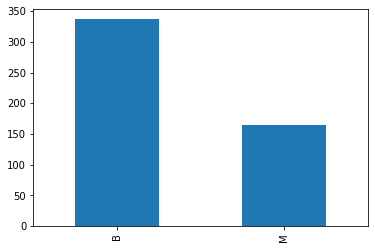

In [ ]:
import matplotlib.pyplot as plt

print(breast_cancer_df10['diagnosis'].value_counts())
breast_cancer_df10['diagnosis'].value_counts().plot(kind='bar')
plt.show()

Another method of displaying imbalances in the dataset.

B    337
M    165
Name: diagnosis, dtype: int64


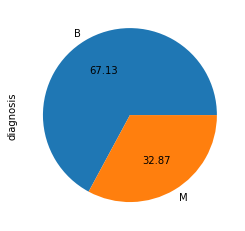

In [ ]:
# assign all attributes excluding the diagnosis attribute to the variable x.
x = breast_cancer_df10.drop(["diagnosis"], axis=1)

# assign all attributes excluding the diagnosis attribute to the variable x.
y = breast_cancer_df10["diagnosis"]

# print the values of the two classes under the diagnosis column
print(y.value_counts())

# plot a pie chart of for the diagnosis column
y.value_counts().plot.pie(autopct="%.2f")

Since the "id" column contained integer values that would influence the logistics regression model, it was removed from the dataset.

To confirm that the "id" column has been removed, the function.head() was invoked.

In [ ]:
# Read the pre-processed dataset

no_id_df = breast_cancer_df10.drop('id', axis = 1)
print (no_id_df.head())

  diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0         B       13.540         14.36           87.46      566.3   
1         B       13.080         15.71           85.63      520.0   
2         B        9.504         12.44           60.34      273.9   
5         M       16.650         21.38          110.00      904.6   
7         M       14.580         21.53           97.41      644.8   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.09779           0.08129         0.06664              0.04781   
1          0.10750           0.12700         0.04568              0.03110   
2          0.10240           0.06492         0.02956              0.02076   
5          0.11210           0.14570         0.15250              0.09170   
7          0.10540           0.18680         0.14250              0.08783   

   symmetry_mean  fractal_dimension_mean  
0         0.1885                 0.05766  
1         0.1967                 0.0

### Encoding
The next step is to locate all the attributes that contain categorical data, in this case, the "diagnosis" attribute, and to store the names of those attributes in the object categorical_col.

The attribute "diagnosis," which contains categorical data, was encoded with numerical data. B and M were swapped out for 0 and 1, respectively.

In [ ]:
# import LabelEncoder from sklearn.preprocessing package
from sklearn.preprocessing import LabelEncoder

# Select Non-Numerical Columns
categorical_col = no_id_df.select_dtypes (exclude=[np.number]).columns
print (categorical_col)
print (no_id_df[categorical_col].head())

# Iterate through column of categorical data to convert to numeric data using LabelEncoder()
label_encoder = LabelEncoder()
for i in categorical_col:
  no_id_df[i] = label_encoder.fit_transform (no_id_df[i])

print("\nLabel Encoder Data:")
print(no_id_df.head())

Index([], dtype='object')
Empty DataFrame
Columns: []
Index: [0, 1, 2, 5, 7]

Label Encoder Data:
   diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0          0       13.540         14.36           87.46      566.3   
1          0       13.080         15.71           85.63      520.0   
2          0        9.504         12.44           60.34      273.9   
5          1       16.650         21.38          110.00      904.6   
7          1       14.580         21.53           97.41      644.8   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.09779           0.08129         0.06664              0.04781   
1          0.10750           0.12700         0.04568              0.03110   
2          0.10240           0.06492         0.02956              0.02076   
5          0.11210           0.14570         0.15250              0.09170   
7          0.10540           0.18680         0.14250              0.08783   

   symmetry_mean  

### Data Transformation

In comparison to using the unscaled data, we have discovered that using the MinMax scaler to scale the data improves the accuracy, precision, and recall of the logistic regression algorithm's prediction of the diagnosis of breast cancer using the current dataset. (accuracy, precision, and recall: 96% vs. 93%, respectively)

In [ ]:
# Data Transformation with MinMax Scaler Method
from sklearn import preprocessing

minmax_scale = preprocessing.MinMaxScaler().fit_transform (no_id_df)
scaled_frame = pd.DataFrame (minmax_scale, columns = no_id_df.columns)
print (scaled_frame.head())

   diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0        0.0     0.481960      0.229516        0.464525   0.357548   
1        0.0     0.448159      0.296150        0.445059   0.318393   
2        0.0     0.185392      0.134748        0.176045   0.110275   
3        1.0     0.710486      0.576012        0.704287   0.643636   
4        1.0     0.558380      0.583416        0.570365   0.423932   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0         0.496971          0.296192        0.243835             0.325459   
1         0.633751          0.514879        0.167142             0.211709   
2         0.561910          0.217874        0.108160             0.141321   
3         0.698549          0.604344        0.557995             0.624234   
4         0.604170          0.800976        0.521405             0.597890   

   symmetry_mean  fractal_dimension_mean  
0       0.555728                0.270841  
1       0.619195              

## Data Shuffling

To eliminate bias that could exist in the original order of the data, the dataset is first randomised by shuffling. All other attributes are used as independent variables, and the "diagnosis" attribute is designated as the dependent variable.

In accordance with the Pareto principle, the shuffled dataset is divided in an 80:20 ratio for training and testing, respectively.

In [ ]:
# Checking the Number of Levels in Categorical Variable
levels = len (pd.value_counts(scaled_frame['diagnosis']))
print ('There are {} levels in the diagnosis column'.format (levels))

# Shuffle Rows Prior to Splitting Data into Features (X) and Outcome (Y)
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

df_shuffled = shuffle (scaled_frame, random_state=42)

# Set the diagnosis attribute as the dependent variable
# All other attributes are set as independent variables
DV = 'diagnosis'

x = df_shuffled.drop (DV, axis=1)
y = df_shuffled [DV]

# Split data in 80:20 ratio. 80% for training, 20% for testing
# random_state = 42 is used to select the 20% of the data set for testing randomly
x_train, x_test, y_train, y_test = train_test_split (x, y, test_size=0.20, random_state=42)

print (x_train.head ())

There are 2 levels in the diagnosis column
     radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
473     0.292380      0.390424        0.287203   0.187822         0.484012   
407     0.545154      0.852912        0.515477   0.425032         0.104803   
44      0.478286      0.621422        0.458675   0.353066         0.352303   
35      0.474612      0.585884        0.450909   0.354757         0.269193   
148     0.392314      0.132280        0.372939   0.271121         0.567545   

     compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
473          0.373840        0.192572             0.189789       0.349845   
407          0.157162        0.127186             0.118244       0.417957   
44           0.275572        0.173838             0.230361       0.496904   
35           0.195819        0.113794             0.138257       0.477554   
148          0.241269        0.145884             0.251872       0.613003   

     fractal_dimension_me

### Logistic Regression
Logistic regression is chosen over single or multiple linear regression due to the categorical nature of the dependent variable (Benign tumour or Malignant tumour), which makes this a classification issue rather than a regression issue.

In [ ]:
from sklearn.linear_model import LogisticRegression
LRmodel=LogisticRegression()
LRmodel.fit(x_train, y_train)

LogisticRegression()

Using the testing dataset "x test," model.predict() generates predicted values for diagnosis M.

0 denotes "benign," while 1 denotes "malignant."

An accuracy of 96% is obtained by comparing this prediction's accuracy to the actual diagnosis results (y test).

In [ ]:
# Predict and store diagnosis based on predictors (train and test dataset)
lr_pred_train = LRmodel.predict(x_train)
lr_pred_test = LRmodel.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score
print("Accuracy for train set: {0:0.4f}".format(accuracy_score(y_train, lr_pred_train)))
print("Accuracy for test set: {0:0.4f}".format(accuracy_score(y_test, lr_pred_test)))

Accuracy for train set: 0.9277
Accuracy for test set: 0.9604


Let us look at how the predicted values look like:

In [ ]:
print(lr_pred_test)

[0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1.
 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 1. 1. 0. 1. 1. 0. 0. 0.
 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0.
 1. 0. 1. 0. 0.]


The predicted values are in terms of respective class (0:Benign, 1:Malignant)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score,  recall_score, roc_curve, auc

print('Accuracy: %0.4f' % accuracy_score(y_test, lr_pred_test))
print('Precision: %0.4f' % precision_score(y_test, lr_pred_test))
print('Recall: %0.4f' % recall_score(y_test, lr_pred_test))

Accuracy: 0.9604
Precision: 1.0000
Recall: 0.8857


The performance of the logistics regression model are evaluated using a confusion matrix, which yields values for accuracy, precision, and recall.

1.   Accuracy = Correct predictions/ Total predictions = 96 %
2.   Precision = True positive / (True positive + False positive) = 100 %
3.   Recall or Sensitivity = True positive / (True positive + False Negative) = 89 %



In [ ]:
# Perfomance evaluation of the logistics regression model
# via confusion matrix and classification report.

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = pd.DataFrame (confusion_matrix(y_test, lr_pred_test))
cm['Total'] = np.sum(cm,axis =1)
cm = cm.append (np.sum(cm, axis=0),ignore_index=True)
cm.columns = ['Predicted Benign', 'Predicted Malignant', 'Total']
cm = cm.set_index([['Actual Benign', 'Actual Malignant', 'Total']])
print("Confusion matrix:")
print (cm)

# Print classification report
from sklearn.metrics import classification_report
print("\nClassification report:")
print(classification_report (y_test, lr_pred_test))

Confusion matrix:
                  Predicted Benign  Predicted Malignant  Total
Actual Benign                   66                    0     66
Actual Malignant                 4                   31     35
Total                           70                   31    101

Classification report:
              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97        66
         1.0       1.00      0.89      0.94        35

    accuracy                           0.96       101
   macro avg       0.97      0.94      0.95       101
weighted avg       0.96      0.96      0.96       101



Text(0.5, 1.0, 'Logistic Regression Model')

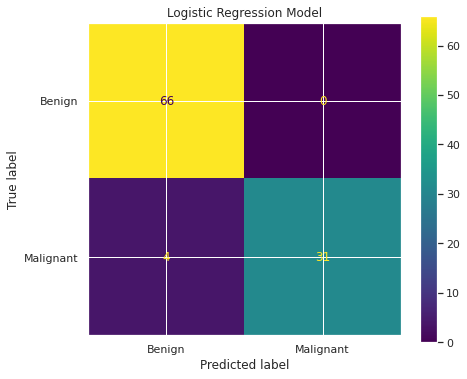

In [ ]:
# Another way to visualise confusion matrix
lr_cm = confusion_matrix(y_test, lr_pred_test)
lr_cm_disp = ConfusionMatrixDisplay(confusion_matrix=lr_cm, display_labels=["Benign", "Malignant"])
lr_cm_disp.plot()
lr_cm_disp.ax_.set_title("Logistic Regression Model")

- Additional research into Sklearn performance metrics revealed that the mean absolute error is only 0.04, which is a small value.
- Both the mean squared error and the root mean squared error are negligibly small, coming in at 0.04 and 0.199, respectively.
- Small error values suggest that there are minor discrepancies between the diagnosis's predicted and actual values.
- An r-squared value of 0.832 indicates that the independent variables can explain 83% of the variation in the diagnosis.

In [ ]:
# Calculate error in logistic regression model
from sklearn import metrics
# Present errors as a table
metrics_df = pd.DataFrame ({'Metric':
['MAE',
'MSE',
'RMSE',
'R-Squared'], 'Value':
[metrics.mean_absolute_error(y_test, LR_pred),
metrics.mean_squared_error (y_test, LR_pred),
np.sqrt (metrics.mean_squared_error (y_test, LR_pred)),
metrics.explained_variance_score (y_test, LR_pred)]}).round(3)
print(metrics_df)

      Metric  Value
0        MAE  0.040
1        MSE  0.040
2       RMSE  0.199
3  R-Squared  0.832


In [ ]:
lr_pred_train = LRmodel.predict(x_train)
lr_pred_test = LRmodel.predict(x_test)

# Get AUC and ROC
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, lr_pred_train)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, lr_pred_test)

train_roc_auc = auc(train_fpr, train_tpr)
test_roc_auc = auc(test_fpr, test_tpr)

print('AUC for train set: %0.4f' % train_roc_auc)
print('AUC for test set: %0.4f' % test_roc_auc)

AUC for train set: 0.9005
AUC for test set: 0.9429


The logistic regression algorithm's area under the curve (AUC) for the test set is 94.29%, meaning that 94.29% of the time it can distinguish between the two classes of the diagnosis attribute.

# Practical Topic 5: Random Forest Classifier
Next, we used the Random Forest Classifier, a type of decision tree algorithm, to forecast the diagnosis of breast cancer using the same dataset.

During instantiation, a number of hyperparameters are defined for this random forest model, including:
- n estimators=400,
- max features=9,
- max depth=3,
- min samples leaf=4,  
- random state=42.

In the random forest model, these self-explanatory parameters are defined to control and shape specific features and structural elements of the decision trees. The number of decision trees in the random forest model, denoted by the value of n estimators, is 400.

In addition, each decision tree is trained with a maximum of nine features. Next, the maximum level of split for each tree is capped at 3 using the max depth variable. Additionally, the min samples leaf of 4 specifies that before the split is taken into account, there must be a minimum of 4 samples in both the left and right branches.

In order to conveniently reproduce the same results, algorithms' randomness is controlled using random state hyperparameter.

In [ ]:
# Import module from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Instantiate and build random forest model
rfc = RandomForestClassifier(n_estimators= 400,
                                 max_features=9, max_depth=3,
                                 min_samples_leaf=4, random_state=42)
rfc.fit(x_train, y_train)

RandomForestClassifier(max_depth=3, max_features=9, min_samples_leaf=4,
                       n_estimators=400, random_state=42)

In [ ]:
rfc_pred_test = rfc.predict(x_test)
print(rfc_pred_test)

[0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1.
 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 1. 1. 0. 1. 1. 1. 0. 0.
 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1.
 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0.
 1. 0. 1. 0. 0.]


In [ ]:
print('Accuracy: %0.4f' % accuracy_score(y_test, rfc_pred_test))
print('Precision: %0.4f' % precision_score(y_test, rfc_pred_test))
print('Recall: %0.4f' % recall_score(y_test, rfc_pred_test))

Accuracy: 0.9307
Precision: 0.9118
Recall: 0.8857


- The Random Forest Classifier algorithm's prediction quality was assessed using the metrics of accuracy, precision, and recall.

- When the algorithm is tested using the training dataset, its accuracy, precision, and recall are all 100%, as expected.
When tested on the testing dataset, the accuracy, precision, and recall/sensitivity are 93%, 91%, and 88.5%, respectively.

- The recall rate is lower than the accuracy and precision rate, indicating that it lacks sensitivity and is slightly prone to false negatives, which may be a problem for an algorithm for detecting breast cancer.

In [ ]:
# Generate Confusion Matrix
cm = pd.DataFrame (confusion_matrix(y_test, rfc_pred_test))
cm['Total'] = np.sum(cm,axis =1)
cm = cm.append (np.sum(cm, axis=0),ignore_index=True)
cm.columns = ['Predicted Benign', 'Predicted Malignant', 'Total']
cm = cm.set_index([['Actual Benign', 'Actual Malignant', 'Total']])
print("Confusion matrix:")
print (cm)

# Print classification report
from sklearn.metrics import classification_report
print("\nClassification report:")
print(classification_report (y_test, rfc_pred_test))

Confusion matrix:
                  Predicted Benign  Predicted Malignant  Total
Actual Benign                   63                    3     66
Actual Malignant                 4                   31     35
Total                           67                   34    101

Classification report:
              precision    recall  f1-score   support

         0.0       0.94      0.95      0.95        66
         1.0       0.91      0.89      0.90        35

    accuracy                           0.93       101
   macro avg       0.93      0.92      0.92       101
weighted avg       0.93      0.93      0.93       101



The random forest classifier algorithm's area under the curve (AUC) for the test set is 92%, meaning that 92% of the time it can distinguish between the two classes of the diagnosis attribute.

In [ ]:
rfc_pred_train = rfc.predict(x_train)
rfc_pred_test = rfc.predict(x_test)

# Get AUC and ROC
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, rfc_pred_train)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, rfc_pred_test)

train_roc_auc = auc(train_fpr, train_tpr)
test_roc_auc = auc(test_fpr, test_tpr)

print('AUC for train set: %0.4f' % train_roc_auc)
print('AUC for test set: %0.4f' % test_roc_auc)

AUC for train set: 0.9659
AUC for test set: 0.9201


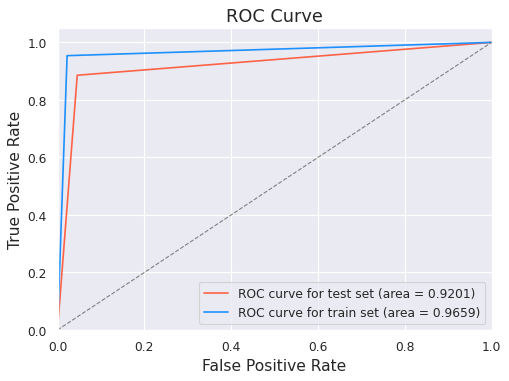

In [ ]:
# Visualize ROC curve
plt.figure(figsize=(7, 5), dpi=80)
plt.plot(test_fpr,
         test_tpr,
         color='tomato',
         label='ROC curve for test set (area = %0.4f)' % test_roc_auc)
plt.plot(train_fpr,
         train_tpr,
         color='dodgerblue',
         label='ROC curve for train set (area = %0.4f)' % train_roc_auc)

plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('ROC Curve', fontsize=16)
plt.legend(loc="lower right")

plt.show()

# Practical Topic 6: Neural Networks
Next, we used the neural networks, a deep learning algorithm, to predict the diagnosis of breast cancer using the same pre-processed dataset.

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping

A neural network model is built to predict the benign or malignant class diagnosis.

A sequential model is developed using Keras API to allow linear stack of layers.

The neural network model consists of 3 layers:  
- 1 input layer
- 1 hidden layer
- 1 output layer

Given that the data contains 10 features and/or predictors, the input layer's neuron count is set at 10.

The hidden layer contains 9 neurons because certain rules require the number of neurons in the hidden layer to fall between the sizes of the input and output layers (Sandhyakrishnan, 2021).

Given that binary classification is the problem, the output layer is defined as having just 1 neuron and using the "sigmoid" activation function.

In [ ]:
# Instantiate and build model with 3 layers
neuralm = Sequential()
neuralm.add(Dense(9, input_dim=10, activation="relu"))
neuralm.add(Dense(1, activation = "sigmoid"))

The neural network model is compiled to specify:
- loss function as binary crossentropy
- optimizer = adam
- metrics to assess = accuracy

In this model, the loss function that compares the actual class and penalises the predicted probabilities based on the magnitude of error is specified as binary crossentropy.

The Adam (Adaptive Moment Estimation) optimizer is specified, which is a combination of two gradient descent algorithms. In layman's terms, gradient descent is a method for iteratively locating the minimum of a function using the first-order derivative. The adam optimizer is used in this instance to reduce the binary crossentropy loss function.

In [ ]:
# Compile neural network model
neuralm.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In order to avoid overfitting on the training data, an early stopping criterion is defined to end the neural network's training session.

As can be seen from the codes below, the validation dataset's loss function is being monitored and minimised.

If the loss function of the validation dataset does not minimise after five epochs, the "patience=5" specifies that the training should be stopped. The model is programmed to restore the model weights that result in the best performance based on validation loss once the early stopping is triggered.

In [ ]:
# Early stopping criteria
es = EarlyStopping(monitor="val_loss", mode="min", patience=5, restore_best_weights=True, verbose=2)

In [ ]:
# Train neural network model
history = neuralm.fit(x_train, y_train, validation_split=0.2, callbacks=[es], epochs=500, batch_size=10)

Epoch 1/500
32/32 [==============================] - 1s 7ms/step - loss: 0.7071 - accuracy: 0.4156 - val_loss: 0.6854 - val_accuracy: 0.5926
Epoch 2/500
32/32 [==============================] - 0s 3ms/step - loss: 0.6729 - accuracy: 0.6500 - val_loss: 0.6644 - val_accuracy: 0.6790
Epoch 3/500
32/32 [==============================] - 0s 3ms/step - loss: 0.6451 - accuracy: 0.7188 - val_loss: 0.6493 - val_accuracy: 0.6173
Epoch 4/500
32/32 [==============================] - 0s 3ms/step - loss: 0.6264 - accuracy: 0.6906 - val_loss: 0.6366 - val_accuracy: 0.6296
Epoch 5/500
32/32 [==============================] - 0s 3ms/step - loss: 0.6099 - accuracy: 0.6969 - val_loss: 0.6229 - val_accuracy: 0.6296
Epoch 6/500
32/32 [==============================] - 0s 3ms/step - loss: 0.5941 - accuracy: 0.7031 - val_loss: 0.6074 - val_accuracy: 0.6667
Epoch 7/500
32/32 [==============================] - 0s 3ms/step - loss: 0.5793 - accuracy: 0.7156 - val_loss: 0.5908 - val_accuracy: 0.6914
Epoch 8/500
3

The neural network's training was stopped at the 160th epoch because it appeared that validation loss would not decrease any further over the course of five epochs. The weights of the model were reset using the 155th epoch.

Prediction is carried out using the predict() function.

The output layer's sigmoid activation function, however, returns a probability for each observation that ranges from 0 to 1.

Therefore, using 0.5 as the threshold value, the probabilities are converted into the class labels (0: Benign & 1: Malignant). The code  first determines whether the probabilities are greater than 0.5 before converting the Boolean values to integers (0: False & 1: True).

The neural network's prediction on the training and testing datasets was then calculated, and it was discovered to achieve 92.5% and 95%, respectively.

In [ ]:
# Perform neural network prediction with threshold of 0.5
neuralm_pred_train = (neuralm.predict(x_train) > 0.5).astype("int32")
neuralm_pred_test = (neuralm.predict(x_test) > 0.5).astype("int32")

In [ ]:
print("Accuracy for train set: {0:0.4f}".format(accuracy_score(y_train, neuralm_pred_train)))
print("Accuracy for test set: {0:0.4f}".format(accuracy_score(y_test, neuralm_pred_test)))

Accuracy for train set: 0.9252
Accuracy for test set: 0.9505


Neural networks performance evaluation using confusion matrix.

Text(0.5, 1.0, 'Neural Network Model')

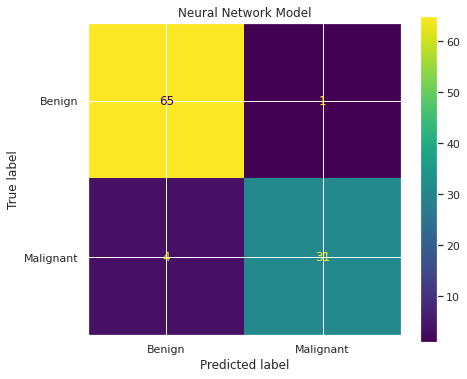

In [ ]:
neuralm_cm = confusion_matrix(y_test, neuralm_pred_test)
neuralm_cm_disp = ConfusionMatrixDisplay(confusion_matrix=neuralm_cm, display_labels=["Benign", "Malignant"])
neuralm_cm_disp.plot()
neuralm_cm_disp.ax_.set_title("Neural Network Model")

or another way to print confusion matrix 👇

In [ ]:
# Generate Confusion Matrix
cm = pd.DataFrame (confusion_matrix(y_test, neuralm_pred_test))
cm['Total'] = np.sum(cm,axis =1)
cm = cm.append (np.sum(cm, axis=0),ignore_index=True)
cm.columns = ['Predicted Benign', 'Predicted Malignant', 'Total']
cm = cm.set_index([['Actual Benign', 'Actual Malignant', 'Total']])
print("Confusion matrix:")
print (cm)

# Print classification report
from sklearn.metrics import classification_report
print("\nClassification report:")
print(classification_report (y_test, neuralm_pred_test))

Confusion matrix:
                  Predicted Benign  Predicted Malignant  Total
Actual Benign                   65                    1     66
Actual Malignant                 4                   31     35
Total                           69                   32    101

Classification report:
              precision    recall  f1-score   support

         0.0       0.94      0.98      0.96        66
         1.0       0.97      0.89      0.93        35

    accuracy                           0.95       101
   macro avg       0.96      0.94      0.94       101
weighted avg       0.95      0.95      0.95       101



Based on the confusion matrix (evaluate on test dataset):
- 4 malignant diagnoses are predicted to be benign (false negative).
- 1 benign diagnosis predicted as malignant (false positive)
- Overall, the neural network model predicted incorrectly 5 times out of 101 times.

Neural networks performance evaluation generated by classification report.

In [ ]:
print("Neural network model's classification report: \n\n"\
+ classification_report(y_test, neuralm_pred_test))

Neural network model's classification report: 

              precision    recall  f1-score   support

         0.0       0.94      0.98      0.96        66
         1.0       0.97      0.89      0.93        35

    accuracy                           0.95       101
   macro avg       0.96      0.94      0.94       101
weighted avg       0.95      0.95      0.95       101



- The F1-score obtained based on the precision and recall is 93%
- The neural network model performs well overall, with a precision and recall of 97% and 89%, respectively. The threshold value on the models can be adjusted to increase the recall percentage.


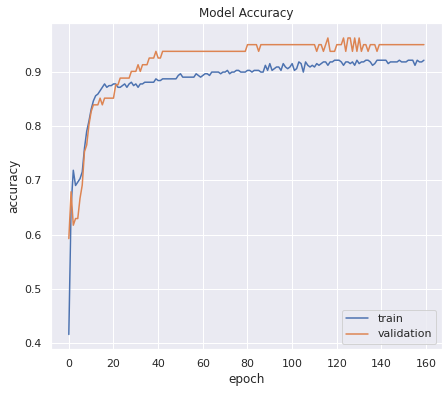

In [ ]:
# Model Accuracy for training and validation data
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model Accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["train", "validation"])

According to the accuracy vs. epoch curve, prediction accuracy increases and is maintained within a range similarly for training and validation datasets. This suggests that the neural network model is neither overfitted nor underfitted.

When a model is overfitted, accuracy on training data typically increases while accuracy on validation data generally decreases.

# Model Comparison Logistic Regression vs. RF vs. NN

The ROC (Receiver Operating Characteristics) curve is used to identify the top-performing model on the breast cancer.csv dataset.

AUC, which stands for area under the ROC curve, is additionally used in parallel to evaluate the model's capability to distinguish between benign and malignant diagnoses.

False positive rate is plotted on the x-axis while true positive rate (recall) is plotted on the y-axis.

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

# Compute false positive rates, true positive rates and thresholds
# based on the logistic regression, random forest and neural network
# models' prediction.
logm_test_fpr, logm_test_tpr, logm_test_thresholds = roc_curve(y_test, lr_pred_test)
rf_test_fpr, rf_test_tpr, rf_test_thresholds = roc_curve(y_test, rfc_pred_test)
neuralm_test_fpr, neuralm_test_tpr, neuralm_test_thresholds = roc_curve(y_test, neuralm_pred_test)

# Compute area under curve for all three prediction models.
logm_auc = auc(logm_test_fpr, logm_test_tpr)
rf_auc = auc(rf_test_fpr, rf_test_tpr)
neuralm_auc = auc(neuralm_test_fpr, neuralm_test_tpr)

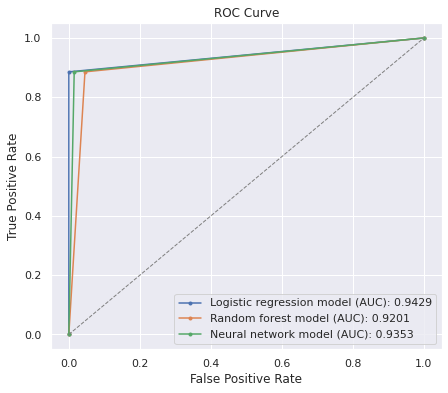

In [ ]:
# Set figure size
sbn.set(rc={"figure.figsize": (7, 6)})

# Plot ROC curve for all three prediction models based on
# respective false positive rate and true positive rate.
plt.plot(logm_test_fpr, logm_test_tpr, label="Logistic regression model (AUC): {0:0.4f}".format(logm_auc), marker=".")
plt.plot(rf_test_fpr, rf_test_tpr, label="Random forest model (AUC): {0:0.4f}".format(rf_auc), marker=".")
plt.plot(neuralm_test_fpr, neuralm_test_tpr, label="Neural network model (AUC): {0:0.4f}".format(neuralm_auc), marker=".")

# Plot line with 0.5 AUC (Random prediction)
plt.plot([0, 1], [0, 1], color='grey', lw=1, linestyle='--')

# Labeling axis and graph title
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")


Based on the ROC curve and AUC of the three models, the logistic regression model has the highest AUC (0.94). This also indicates that the logistic regression model has a 94% chance of correctly differentiating between patients with benign and malignant conditions.

The logistic regression model's true positive rate (recall) and the neural network's true positive rate (recall) are both 89%, indicating that these models' predictions contain the fewest false negatives (actual malignant), which are the factors in this case that are most concerning.

Overall, the model with the best performance is logistic regression, which is followed by neural networks and random forests.

# Conclusion
- False benign predictions (false negatives) are viewed in this study as being more serious errors than false malignant predictions when it comes to the diagnosis of breast cancer (false positive).
- This is due to the possibility that a patient with a malignant diagnosis who was incorrectly predicted may need additional confirmation using different techniques before receiving the appropriate treatment.
- Whereas a patient with a benign diagnosis who was incorrectly predicted may be sent home with a tumour that could later progress and endanger their life.
- As a result, this study places the most emphasis on recall of malignant prediction.